# **Institutional Drivers of Mental Treatment: Statistical Analysis of Mental Health Support in Tech Organizations**

#Introduction:
Due to high workloads, intense competition, and fast-paced work environments, mental health has become an increasingly critical issue in the technology sector.

This study utilizes the OSMI Mental Health in Tech Survey dataset to examine the relationship between corporate support mechanisms and employees’ likelihood of seeking mental health treatment.

#-Research Question:

Do workplace mental health support mechanisms (e.g., mental health benefits, care options, and formal policies) significantly influence employees’ likelihood of seeking mental health treatment?

#-Hypothesis:

Employees working in companies that provide corporate mental health support are more likely to seek treatment compared to those working in companies that do not provide such support.

#-Methodology:

* Data cleaning and preprocessing

* Exploratory Data Analysis (EDA)

* Chi-Square Test of Independence to evaluate relationships between categorical variables

* Interpretation of statistical significance and practical implications

This analysis aims not only to identify statistically significant relationships but also to derive meaningful organizational insights for workplace mental health strategies.

# Import Libraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data Set

In [40]:
df = pd.read_csv("survey.csv")

# Data Exploration

In [41]:
df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [42]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [43]:
df.shape

(1259, 27)

In [44]:
df.dtypes

,0
Timestamp,object
Age,int64
Gender,object
Country,object
state,object
self_employed,object
family_history,object
treatment,object
work_interfere,object
no_employees,object


In [45]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [46]:
df.isnull().sum()

,0
Timestamp,0
Age,0
Gender,0
Country,0
state,515
self_employed,18
family_history,0
treatment,0
work_interfere,264
no_employees,0


# Data Preprocessing and Cleaning

In [47]:
df["Age"].describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [48]:
df["Age"].sort_values().head(30)

,Age
715,-1726
143,-29
1127,-1
734,5
989,8
1090,11
118,18
93,18
287,18
43,18


In [49]:
df["Age"].sort_values(ascending=False).head(30)

,Age
390,99999999999
364,329
1182,72
560,65
520,62
952,61
1236,60
297,60
471,58
475,57


In [50]:
df= df[(df["Age"]>=18) & (df["Age"]<=70)].copy() #Age values were filtered to include only respondents between 18 and 70 years old

In [51]:
df["Age"].describe()

,Age
count,1250.000000
mean,32.044800
std,7.203076
min,18.000000
25%,27.000000
50%,31.000000
75%,36.000000
max,65.000000


In [52]:
df["Gender"].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'Enby', 'fluid',
       'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'Malr', 'femail',
       'Cis Man', 'ostensibly male, unsure what that really means'],
      dtype=object)

In [53]:
#Gender entries were standardized by consolidating inconsistent responses into unified categories.
df["Gender"] = df["Gender"].str.lower().str.strip()

df["Gender"] = df["Gender"].replace(
[
"m", "male", "male-ish", "maile", "something kinda male?",
"cis male", "mal", "male (cis)", "make",
"guy (-ish) ^_^", "male leaning androgynous",
"man", "msle", "mail", "malr", "cis man"
], "male"
)

df["Gender"] = df["Gender"].replace(
[
"female", "f", "cis female", "woman",
"femake", "cis-female/femme",
"female (cis)", "femail"
], "female"
)

df["Gender"] = df["Gender"].replace(
[
"trans-female", "queer/she/they",
"non-binary", "genderqueer", "androgyne",
"agender", "enby", "fluid",
"trans woman", "female (trans)",
"neuter", "queer" , "nah" , "ostensibly male, unsure what that really means"
], "queer/other"
)


In [54]:
df["Gender"].value_counts()

,count
Gender,
male,989
female,246
queer/other,15


# Exploratory Data Analysis (EDA)

In [55]:
df.dtypes

,0
Timestamp,object
Age,int64
Gender,object
Country,object
state,object
self_employed,object
family_history,object
treatment,object
work_interfere,object
no_employees,object


In [56]:
def categorical(variable):
  cat = df[variable]
  num = cat.value_counts(dropna=False)

  plt.figure(figsize=(8,5))
  plt.bar(num.index, num)
  plt.xlabel(variable)
  plt.ylabel("Frequency")
  plt.title (f"{variable} Distrubution")
  plt.show()
  print(variable , num)

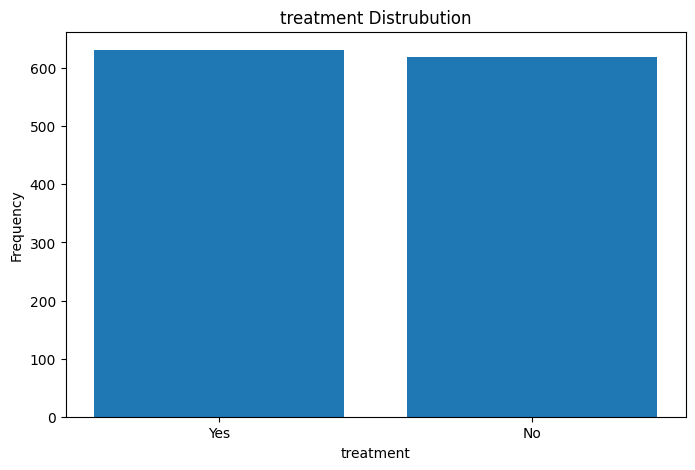

treatment treatment
Yes    631
No     619
Name: count, dtype: int64


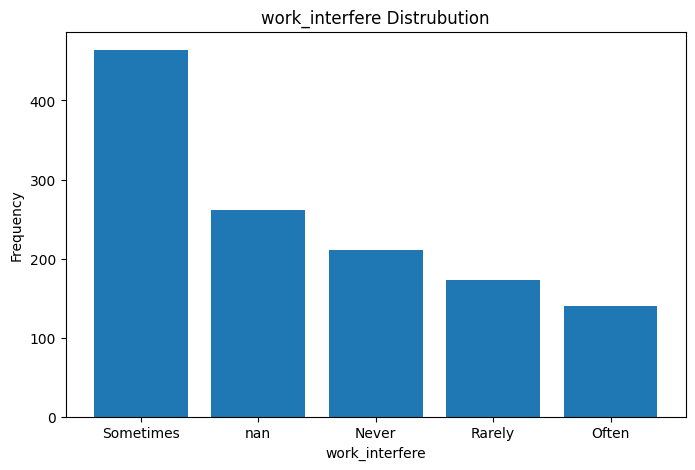

work_interfere work_interfere
Sometimes    464
nan          262
Never        211
Rarely       173
Often        140
Name: count, dtype: int64


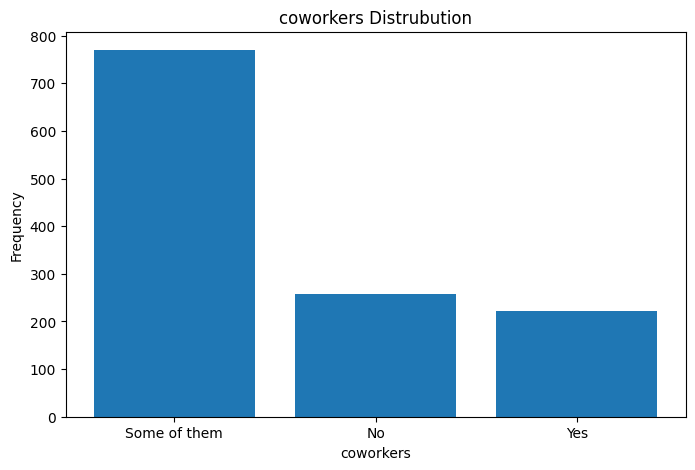

coworkers coworkers
Some of them    770
No              258
Yes             222
Name: count, dtype: int64


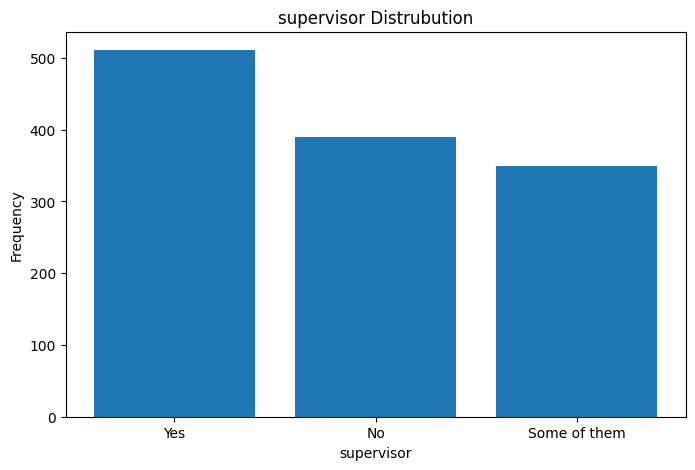

supervisor supervisor
Yes             511
No              390
Some of them    349
Name: count, dtype: int64


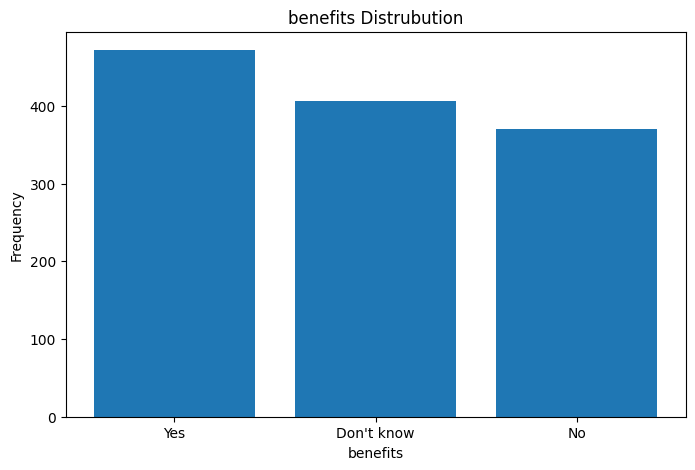

benefits benefits
Yes           472
Don't know    407
No            371
Name: count, dtype: int64


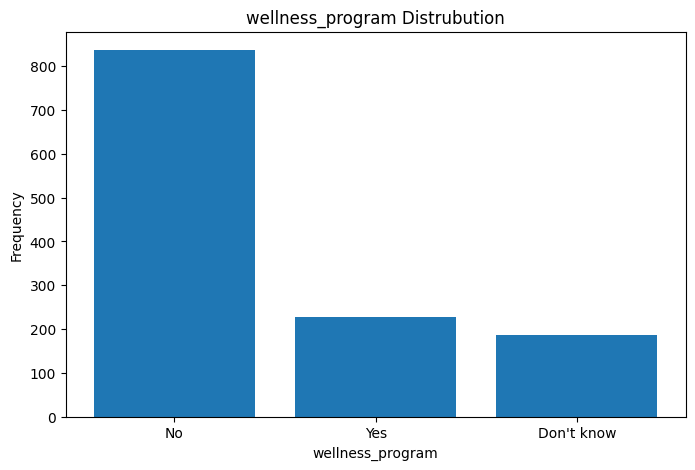

wellness_program wellness_program
No            837
Yes           227
Don't know    186
Name: count, dtype: int64


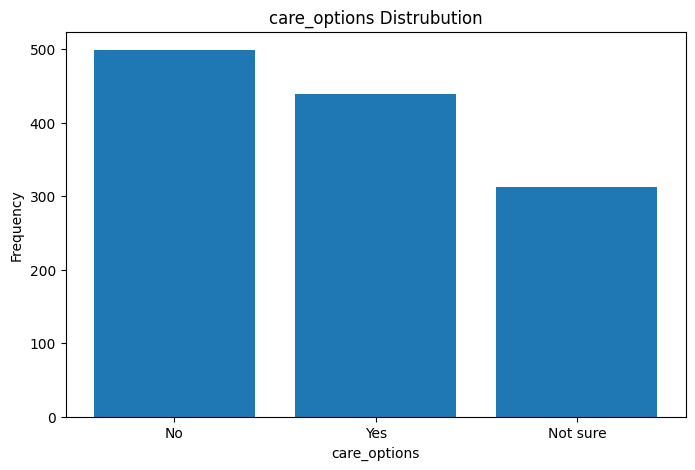

care_options care_options
No          499
Yes         439
Not sure    312
Name: count, dtype: int64


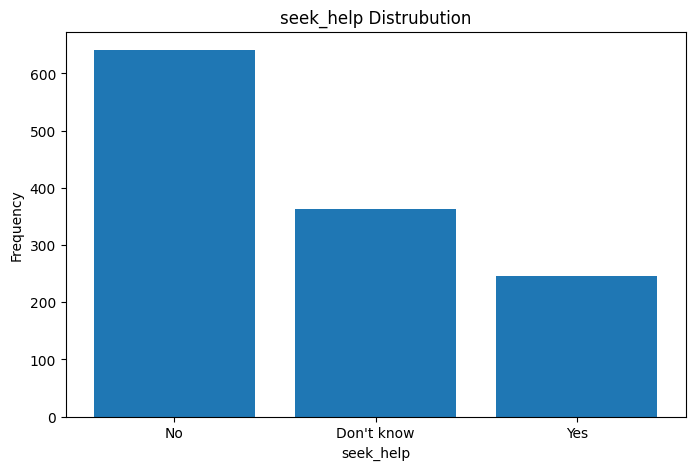

seek_help seek_help
No            641
Don't know    363
Yes           246
Name: count, dtype: int64


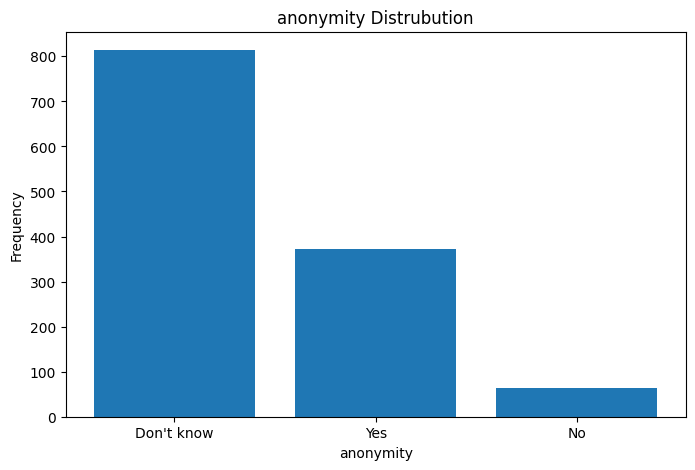

anonymity anonymity
Don't know    814
Yes           372
No             64
Name: count, dtype: int64


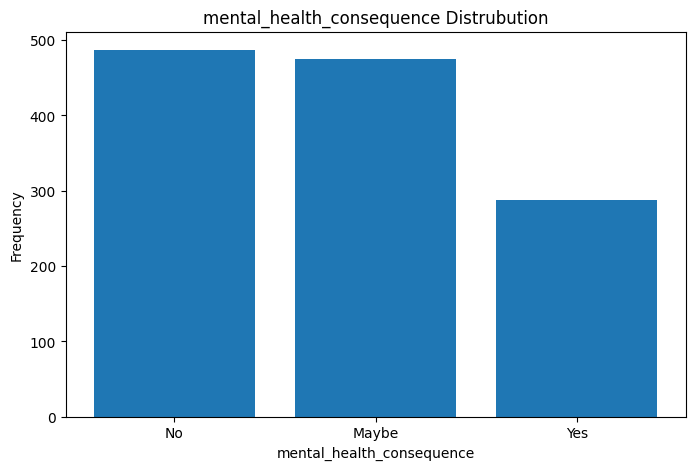

mental_health_consequence mental_health_consequence
No       487
Maybe    475
Yes      288
Name: count, dtype: int64


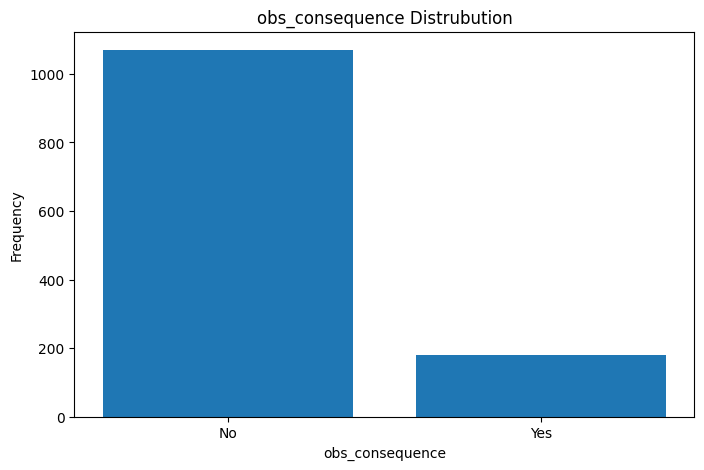

obs_consequence obs_consequence
No     1070
Yes     180
Name: count, dtype: int64


In [57]:
import matplotlib.pyplot as plt

def categorical(variable):
  cat = df[variable]
  num = cat.value_counts(dropna=False)
  # Converting index to string to handle potential NaN values
  num.index = num.index.astype(str)

  plt.figure(figsize=(8,5))
  plt.bar(num.index, num)
  plt.xlabel(variable)
  plt.ylabel("Frequency")
  plt.title (f"{variable} Distrubution")
  plt.show()
  print(variable , num)

cat1 = ["treatment" , "work_interfere" , "coworkers" , "supervisor" , "benefits" , "wellness_program", "care_options" ,  "seek_help" , "anonymity" , "mental_health_consequence" , "obs_consequence"]
for i in cat1:
  categorical(i)

# Hypothesis Testing (Chi-Square Test of Independence)

**-H0** (Null Hypothesis):
There is no association between workplace mental health support mechanisms and employees’ treatment-seeking behavior.

**-H1** (Alternative Hypothesis):
There is a significant association between workplace mental health support mechanisms and employees’ treatment-seeking behavior.

In [58]:
pd.crosstab(df["wellness_program"], df["treatment"]  , normalize="index")

treatment,No,Yes
wellness_program,,
Don't know,0.569892,0.430108
No,0.501792,0.498208
Yes,0.409692,0.590308


In [59]:
pd.crosstab(df["care_options"], df["treatment"] , normalize="index")

treatment,No,Yes
care_options,,
No,0.587174,0.412826
Not sure,0.608974,0.391026
Yes,0.309795,0.690205


In [60]:
pd.crosstab(df["seek_help"], df["treatment"] , normalize="index")

treatment,No,Yes
seek_help,,
Don't know,0.542700,0.457300
No,0.500780,0.499220
Yes,0.410569,0.589431


In [61]:
pd.crosstab(df["benefits"], df["treatment"] , normalize="index")

treatment,No,Yes
benefits,,
Don't know,0.628993,0.371007
No,0.517520,0.482480
Yes,0.362288,0.637712


In [62]:
pd.crosstab(df["anonymity"], df["treatment"] , normalize="index")

treatment,No,Yes
anonymity,,
Don't know,0.547912,0.452088
No,0.421875,0.578125
Yes,0.392473,0.607527


In [63]:
from scipy.stats import chi2_contingency

table = pd.crosstab(df["wellness_program"], df["treatment"])

chi2, p, dof, expected = chi2_contingency(table)

print("Chi-square-value:", chi2)
print("p-value:", p)

Chi-square-value: 10.936255519243563
p-value: 0.004219123982276067


The chi-square test results indicate a statistically significant relationship between employers addressing mental health within their employee wellness programs and employees' treatment-seeking behavior ($p = 0.004$).

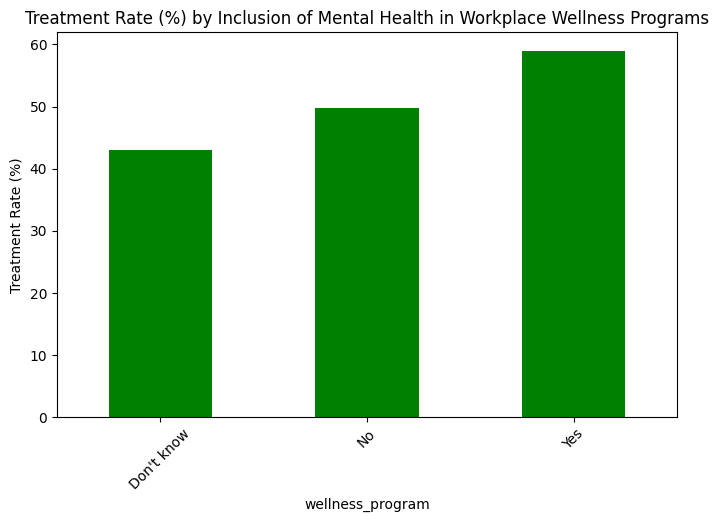

In [64]:
plt.figure(figsize=(8,5))

ct = pd.crosstab(df["wellness_program"], df["treatment"], normalize="index")

values = ct["Yes"] * 100
values.plot(kind="bar" , color="g")

plt.ylabel("Treatment Rate (%)")
plt.title("Treatment Rate (%) by Inclusion of Mental Health in Workplace Wellness Programs")
plt.xticks(rotation=45)

plt.show()

**Observation:** Treatment-seeking rates are significantly higher in organizations that discuss mental health.

**Conclusion:** Proactive communication about mental health in the workplace encourages employees to seek the care they need.

In [65]:
from scipy.stats import chi2_contingency

table = pd.crosstab(df["care_options"], df["treatment"])

chi2, p, dof, expected = chi2_contingency(table)

print("Chi-square-value:", chi2)
print("p-value:", p)

Chi-square-value: 93.41073203102371
p-value: 5.201364200148813e-21


Chi-square test results indicate a highly significant relationship between employees' awareness of employer-provided mental health service options and their treatment-seeking behavior ($p < 0.001$).

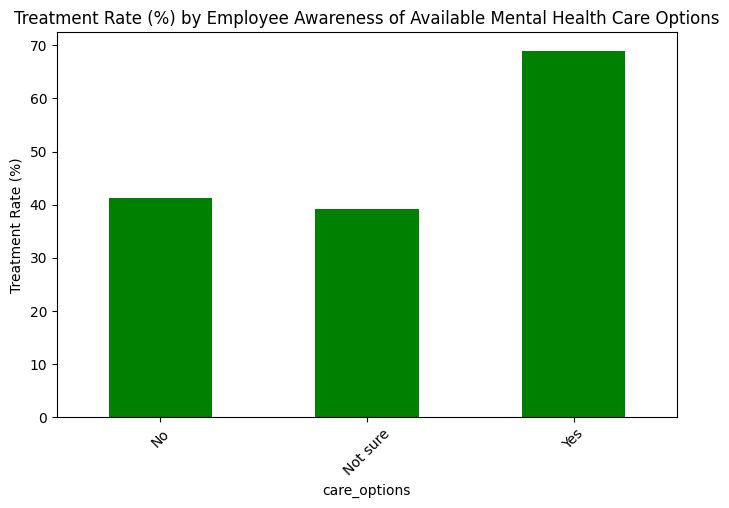

In [66]:
plt.figure(figsize=(8,5))

ct = pd.crosstab(df["care_options"], df["treatment"], normalize="index")

values = ct["Yes"] * 100
values.plot(kind="bar" , color="g")

plt.ylabel("Treatment Rate (%)")
plt.title("Treatment Rate (%) by Employee Awareness of Available Mental Health Care Options")
plt.xticks(rotation=45)

plt.show()

**Observation:** There is a very strong, positive correlation between employees' knowledge of available mental health services and their actual treatment-seeking behavior. Employees who are aware of their options are significantly more likely to access professional help.

**Statistical Significance:** The chi-square test yielded a highly significant result ($p < 0.001$, specifically $p = 5.23 \times 10^{-21}$), indicating that this relationship is not due to random chance.

**Conclusion:** Awareness is a key driver of service utilization. It’s not just about having the programs; communicating them effectively is what bridges the gap between the employer providing support and the employee seeking care.

In [67]:
from scipy.stats import chi2_contingency

table = pd.crosstab(df["seek_help"], df["treatment"])

chi2, p, dof, expected = chi2_contingency(table)

print("Chi-square-value:", chi2)
print("p-value:", p)

Chi-square-value: 10.40462057153155
p-value: 0.005503834291284138


Chi-square test results indicate a significant relationship between the resources employers provide to learn more about mental health issues and ways to seek help, and employees' treatment-seeking behaviors. ($p = 0.0055$)

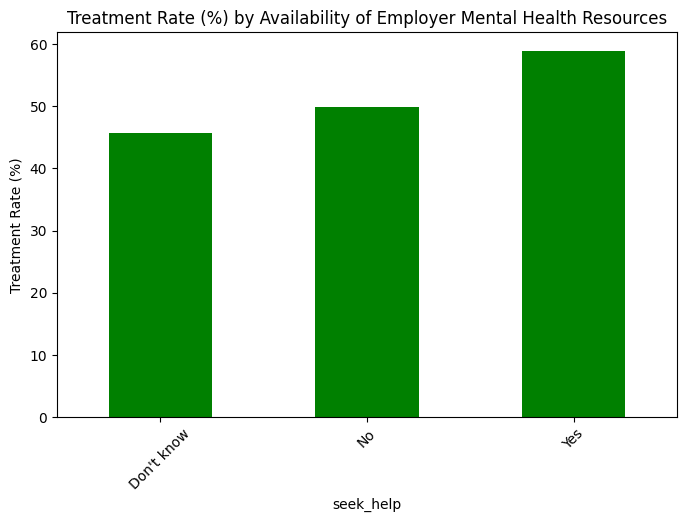

In [68]:
plt.figure(figsize=(8,5))

ct = pd.crosstab(df["seek_help"], df["treatment"], normalize="index")

values = ct["Yes"] * 100
values.plot(kind="bar" , color="g")

plt.ylabel("Treatment Rate (%)")
plt.title("Treatment Rate (%) by Availability of Employer Mental Health Resources")
plt.xticks(rotation=45)

plt.show()

**Observation:** The chi-square test confirms a significant relationship between the availability of educational resources and employees' treatment-seeking behavior ($p = 0.0055 < 0.05$). Employees who have access to information on mental health issues and how to get help show different treatment patterns compared to those without such resources.

**Conclusion:** Providing educational resources acts as an effective intervention. When employers offer clear "ways to seek help," it reduces the barrier to entry for professional treatment, suggesting that information-sharing is a key component of a supportive workplace culture.

In [69]:
from scipy.stats import chi2_contingency

table = pd.crosstab(df["benefits"], df["treatment"])

chi2, p, dof, expected = chi2_contingency(table)

print("Chi-square-value:", chi2)
print("p-value:", p)

Chi-square-value: 63.23969061057046
p-value: 1.8521479073804376e-14


Chi-square test results indicate a highly significant relationship between employers providing mental health support and employees' treatment-seeking behaviors. ($p=1.85 \times 10^{-14}$)

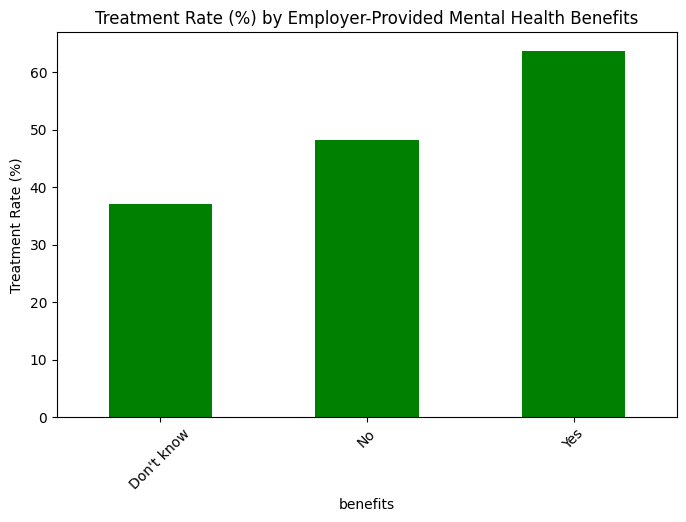

In [70]:
plt.figure(figsize=(8,5))

ct = pd.crosstab(df["benefits"], df["treatment"], normalize="index")

values = ct["Yes"] * 100
values.plot(kind="bar" , color="g")

plt.ylabel("Treatment Rate (%)")
plt.title("Treatment Rate (%) by Employer-Provided Mental Health Benefits")
plt.xticks(rotation=45)

plt.show()

**Observation:** There is an exceptionally strong relationship between whether an employer provides mental health support and employees' propensity to seek treatment. The presence of formal support systems is a major determinant in the help-seeking process.

**Conclusion:** The data suggests that when employers actively provide mental health support, it significantly lowers the barrier for employees to seek professional care. This confirms that organizational support is not just a "perk," but a critical catalyst for employee mental health interventions.

In [71]:
from scipy.stats import chi2_contingency

table = pd.crosstab(df["anonymity"], df["treatment"])

chi2, p, dof, expected = chi2_contingency(table)

print("Chi-square-value:", chi2)
print("p-value:", p)

Chi-square-value: 26.128210525352312
p-value: 2.1199771181243824e-06


Chi-square test results indicate a highly significant relationship between the protection of employee anonymity when seeking treatment for mental health or substance abuse and employees' treatment-seeking behavior. ($p = 2.12 \times 10^{-6}$)

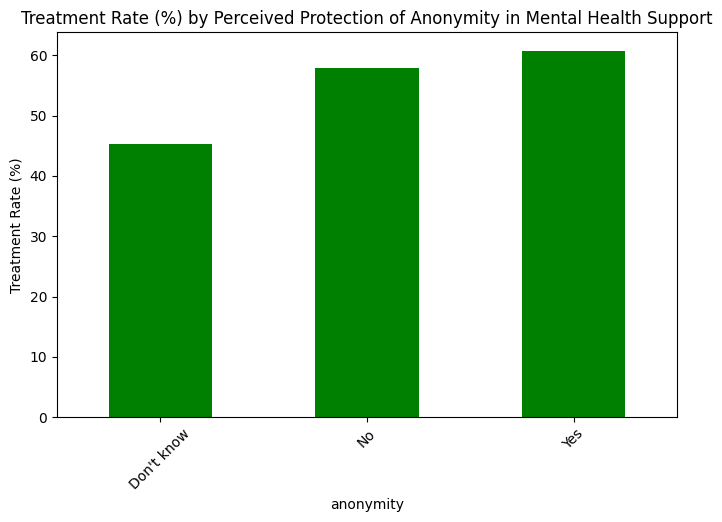

In [72]:
plt.figure(figsize=(8,5))

ct = pd.crosstab(df["anonymity"], df["treatment"], normalize="index")

values = ct["Yes"] * 100
values.plot(kind="bar" , color="g")

plt.ylabel("Treatment Rate (%)")
plt.title("Treatment Rate (%) by Perceived Protection of Anonymity in Mental Health Support")
plt.xticks(rotation=45)

plt.show()

**Observation:** The chi-square test confirms a highly significant relationship between the protection of employee anonymity and their decision to seek treatment ($p = 2.12 \times 10^{-6}$). Employees appear to be more comfortable seeking help when they believe their privacy is strictly maintained.

**Statistical Significance:** With a Chi-square value of $26.13$ and a $p$-value well below $0.05$, we reject the null hypothesis of independence.

**Conclusion:** Privacy concerns are a major factor in workplace mental health. Ensuring anonymity acts as a "safety net" for employees, suggesting that even if a company provides excellent resources, employees may hesitate to use them unless they are certain their professional reputation is protected.

# Executive Summary

The comprehensive chi-square analysis reveals that employee treatment-seeking behavior is strongly influenced by organizational proactive measures.

Our findings demonstrate that simply providing a wellness program is not enough; awareness of options, clear communication of resources, active employer support, and guaranteed anonymity are all statistically significant drivers of professional help-seeking. Collectively, these results suggest that a supportive, transparent, and privacy-focused workplace culture significantly lowers the barriers to mental health care and encourages employees to prioritize their well-being.

# Actionable Insights


**Action Plan for Employers:**

Based on these analysis results, the following steps should be taken to increase mental health participation in the workplace:

* Create an Accessible Information Bank: Don't just offer a program; prepare a continuously updated guide or internal portal where employees can easily find out what help is available and where to get it.

* Emphasize Privacy Guarantees: To overcome employees' biggest concern, the fear of being “noticed,” periodically remind them that the help-seeking process is completely anonymous and will never affect their careers.

* Make Leadership Support Visible: Managers openly discussing mental health and encouraging employees to use these resources is one of the most powerful motivators for directly increasing treatment-seeking rates.